In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import the data

In [2]:
# read csv files which have a semicolon as a delimiter

orders= pd.read_csv("data_magist_CSVs/orders.csv" , sep=';')
order_items = pd.read_csv("data_magist_CSVs/order_items.csv", sep=';')
order_payments = pd.read_csv("data_magist_CSVs/order_payments.csv", sep=';')
order_reviews = pd.read_csv("data_magist_CSVs/order_reviews.csv", sep=';')
customers = pd.read_csv("data_magist_CSVs/customers.csv", sep=';')
products = pd.read_csv("data_magist_CSVs/products.csv", sep=';')
sellers = pd.read_csv("data_magist_CSVs/sellers.csv", sep=';')
product_category_name_translation = pd.read_csv("data_magist_CSVs/product_category_name_translation.csv", sep=';')

# Load Brazilian geo data with semicolon delimiter and Latin-1 encoding
# This will handle the special Portuguese characters like ã, ç, é (like São Luís, João Pessoa)
geo = pd.read_csv("data_magist_CSVs/geo.csv", sep=";",encoding='latin1')  


# make a copy of each dataframe
orders_df = orders.copy()
order_items_df = order_items.copy()
order_payments_df = order_payments.copy()
order_reviews_df = order_reviews.copy()
customers_df = customers.copy()
geo_df = geo.copy()
products_df = products.copy()
sellers_df = sellers.copy()
product_category_name_translation_df = product_category_name_translation.copy()

# 2. Exploring datasets
## 2.1. orders_df

In [4]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 10:59:02,2017-09-13 11:45:35,2017-09-19 20:34:16,2017-09-21 01:43:48,2017-09-29 02:00:00
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 12:53:06,2017-04-26 13:05:13,2017-05-04 16:35:00,2017-05-12 18:04:24,2017-05-15 02:00:00
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 15:33:31,2018-01-14 15:48:30,2018-01-16 13:36:48,2018-01-22 14:19:16,2018-02-05 01:00:00


In [8]:
# convert the datatype of date-related columns into datetime

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [9]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [10]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
orders_df.shape

(99441, 8)

In [12]:
# Null handling
orders_df.dropna(subset='order_delivered_customer_date').info()

<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [14]:
# droping NULLs
orders_df = orders_df.dropna()

In [16]:
orders_df.shape

(96461, 8)

In [15]:
# duplicate handling
orders_df.drop_duplicates().shape

(96461, 8)

## 2.2. orders_items_df

In [17]:
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 11:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 13:05:13,239.9,19.93


In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
# convert the datatype of date column
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [21]:
order_items_df.drop_duplicates().shape

(112650, 7)

## 2.3. products_df

In [22]:
products_df.head(3)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53,596,6,300,20,16,16
1,00088930e925c41fd95ebfe695fd2655,automotivo,56,752,4,1225,55,10,26
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50,266,2,300,45,15,35


In [23]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32951 non-null  object
 1   product_category_name       32951 non-null  object
 2   product_name_length         32951 non-null  int64 
 3   product_description_length  32951 non-null  int64 
 4   product_photos_qty          32951 non-null  int64 
 5   product_weight_g            32951 non-null  int64 
 6   product_length_cm           32951 non-null  int64 
 7   product_height_cm           32951 non-null  int64 
 8   product_width_cm            32951 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 2.3+ MB


In [24]:
products_df.drop_duplicates().shape

(32951, 9)

### change the produtcs' names using product_category_name_translation_df

In [25]:
product_category_name_translation_df.head(2)

,product_category_name,product_category_name_english
0,agro_industria_e_comercio,agro_industry_and_commerce
1,alimentos,food


In [26]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          74 non-null     object
 1   product_category_name_english  74 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [27]:
# merge to dataframes, products _df & product_category_name_translation_df

merged_product_translation = pd.merge(products_df , product_category_name_translation_df, on='product_category_name', how='left')

In [28]:
merged_product_translation.sample(4)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
164,014fcf6bd5cd4c7ee29fb3bb618c445e,outros,0,0,0,7000,55,30,45,others
31343,f361fccba568fabe00db466f80626d1e,automotivo,20,908,1,75,17,8,13,auto
20737,a152e968e6e943c06ca8ad6fbafc72a0,papelaria,59,315,4,5750,60,20,29,stationery
24979,c23bb9673ec1f70f31171d5a7dff1260,cama_mesa_banho,53,396,1,550,16,10,16,bed_bath_table


In [29]:
# drop the products' names ('product_category_name' column)
merged_product_translation = merged_product_translation.drop(columns=['product_category_name'])


In [30]:
# Rename the 'product_category_name_english' column to 'product_category_name'
merged_product_translation.rename(columns= {'product_category_name_english':'product_category_name'}, inplace=True)

In [32]:
translated_products_df = merged_product_translation.copy()

## 2.4. customers_df

In [33]:
customers_df.sample(3)

,customer_id,customer_zip_code_prefix
10829,2f5d425fd3094d84a0a7d9fb14412279,4890
97929,42da83bec6f09f825ff65b49cd4fd618,96470
91525,fda22da528e2ea3d3ab92fc76b64a014,88330


In [34]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [35]:
customers_df.drop_duplicates().shape

(99441, 2)

## 2.5. sellers_df

In [36]:
sellers_df.sample(3)

,seller_id,seller_zip_code_prefix
847,c2bda99904207edd1834f03e0022b007,8280
2174,34d1ca11b242c0fee2c834ae8d788566,36415
2126,d558ebe531605a1285ab2b1bc3256dfb,35501


In [37]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.5+ KB


In [40]:
sellers_df.drop_duplicates().shape

(3095, 2)

## 2.6. order_payments_df

In [41]:
order_payments_df.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [42]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
order_payments_df.drop_duplicates().shape

(103886, 5)

## 2.7. order_reviews_df

In [44]:
order_reviews_df.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0001239bc1de2e33cb583967c2ca4c67,fc046d7776171871436844218f817d7d,5,NaN,NaN,2018-03-20 01:00:00,2018-03-20 19:36:04
1,0001cc6860aeaf5b9017fe4131a52e62,d4665434b01caa9dc3e3e78b3eb3593e,5,NaN,NaN,2018-06-22 02:00:00,2018-06-26 15:51:29
2,00020c7512a52e92212f12d3e37513c0,e28abf2eb2f1fbcbdc2dd0cd9a561671,5,Entrega rápida!,A entrega foi super rápida e o pendente é lind...,2018-04-25 02:00:00,2018-04-26 16:55:36


In [45]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98371 entries, 0 to 98370
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                98371 non-null  object
 1   order_id                 98371 non-null  object
 2   review_score             98371 non-null  int64 
 3   review_comment_title     11618 non-null  object
 4   review_comment_message   41119 non-null  object
 5   review_creation_date     98371 non-null  object
 6   review_answer_timestamp  98371 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# we keep just review_score, which has no Null, so we leave other Nulls!

---

#  3. Answer business questions

### 3.1.How many months of data are included in the magist database?

In [48]:
months = orders_df['order_purchase_timestamp'].dt.to_period('M').nunique()
months

23

### 3.2. How much is Magist's monthly and yearly revenue? Are there any pattern on Magist's sale in this period of time? 


In [50]:
orders_df['order_id'].nunique()

96461

In [51]:
order_items_df['order_id'].nunique()

98666

In [52]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [63]:
order_items_grouped = order_items_df.groupby(['order_id']).agg({
    'product_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
}).rename(columns={'product_id': 'product_count'})

In [64]:
order_items_grouped.sample(4)

,product_count,price,freight_value
order_id,,,
852d591ac66808ba170d243164600420,1,75.0,12.97
a2f7b7dd8e50a59d16010e3d5a52b2cd,1,51.9,16.12
066783a7a5bfa25f21a22e17c7ec9137,1,49.0,16.05
b009b4a885293bec82f26aec9664814e,1,254.9,19.86


In [60]:
order_items_grouped_2.shape

(98666, 3)

In [67]:
# merging two dataframe: orders and order_items_grouped
grouped_orders_df = pd.merge(orders_df, order_items_grouped, on='order_id', how='inner')
grouped_orders_df.sample(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_count,price,freight_value
1195,03347815dd6e37a668b3954401838318,a3a4dcea8bf35b152eb89c42e403f258,delivered,2018-02-27 20:58:23,2018-02-27 21:09:37,2018-03-02 16:38:50,2018-03-22 00:12:21,2018-03-26 02:00:00,1,260.0,35.18
13051,22a70dec3f33737fa17ad9ae098b37f8,d597b312cf0c17b32455637f9e257341,delivered,2017-05-17 12:53:24,2017-05-17 13:02:41,2017-05-23 13:39:34,2017-05-24 13:09:40,2017-05-30 02:00:00,1,139.9,9.79
73984,c45067032fd84f4cf408730ff5205568,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 14:09:45,2018-05-16 14:39:20,2018-05-17 14:41:00,2018-05-22 19:28:28,2018-06-12 02:00:00,1,179.8,19.14
86701,e5ac2ec6985bd8401bc382345e4266b3,187a209cec5b138187e8e4bfa8fd8825,delivered,2018-03-28 20:59:41,2018-03-29 20:55:18,2018-04-05 20:31:09,2018-04-07 03:08:46,2018-04-12 02:00:00,1,39.9,11.15


In [68]:
# creat the month and year columns in the dataframe to calculate the revenue monthly and yearly and also ploting a chart
grouped_orders_df['month'] = grouped_orders_df['order_purchase_timestamp'].dt.month
grouped_orders_df['year'] = grouped_orders_df['order_purchase_timestamp'].dt.year

In [69]:
grouped_orders_df.sample(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_count,price,freight_value,month,year
43884,748c52d1621e759a512c6175e674dfbe,1ee92569128ef615966b47ef4ba6c2f0,delivered,2017-10-02 23:12:48,2017-10-03 23:24:24,2017-10-05 21:15:05,2017-10-14 04:41:24,2017-10-18 02:00:00,1,362.99,11.36,10,2017
19160,331ec8fd37b237cfe255176db487a755,3a4f2ca546552859fbee998bc87240b4,delivered,2017-10-31 19:57:56,2017-10-31 20:34:38,2017-11-01 19:42:49,2017-11-06 15:07:38,2017-11-10 01:00:00,1,16.90,8.27,10,2017
80349,d4c1356b86dcc8a86c603174ba27d9bc,5bb44f6a01f1362e3eb39c521d1d1b08,delivered,2018-01-04 23:16:30,2018-01-04 23:27:42,2018-01-10 12:13:54,2018-01-17 23:59:07,2018-01-30 01:00:00,1,69.90,16.12,1,2018
84806,e0bacd42e5f8077488c0a9f4dcfe66da,ad9e8236c07bc00edfcd2f7805ceb771,delivered,2017-04-21 02:11:35,2017-04-21 03:05:19,2017-05-19 10:46:40,2017-06-08 15:22:16,2017-06-02 02:00:00,2,899.80,249.08,4,2017


In [71]:
monthly_sale = grouped_orders_df.groupby(['year','month'])['product_count'].sum().unstack()

In [72]:
monthly_sale

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,319.0,NaN,1.0
2017,908.0,1846.0,2893.0,2567.0,3996.0,3502.0,4399.0,4809.0,4731.0,5221.0,8468.0,6196.0
2018,8019.0,7528.0,8019.0,7811.0,7815.0,7014.0,6929.0,7186.0,NaN,NaN,NaN,NaN


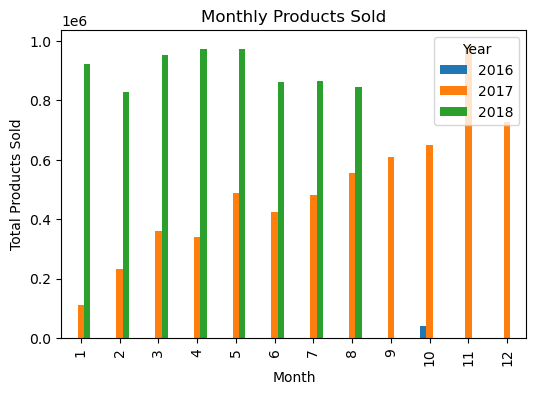

In [252]:
# Monthly Sold Products by Magist

monthly_sale.T.plot(kind='bar', figsize=(6,4))     # use T.plot to have months as columns
plt.title('Monthly Products Sold')
plt.xlabel('Month')
plt.ylabel('Total Products Sold')
plt.legend(title='Year');

In [84]:
monthly_sold_products = grouped_orders_df.resample("ME", on="order_purchase_timestamp")['product_count'].sum()
monthly_sold_products .index = monthly_sold_products .index.strftime('%b %Y')    #  to have the date like yyyy-MM 

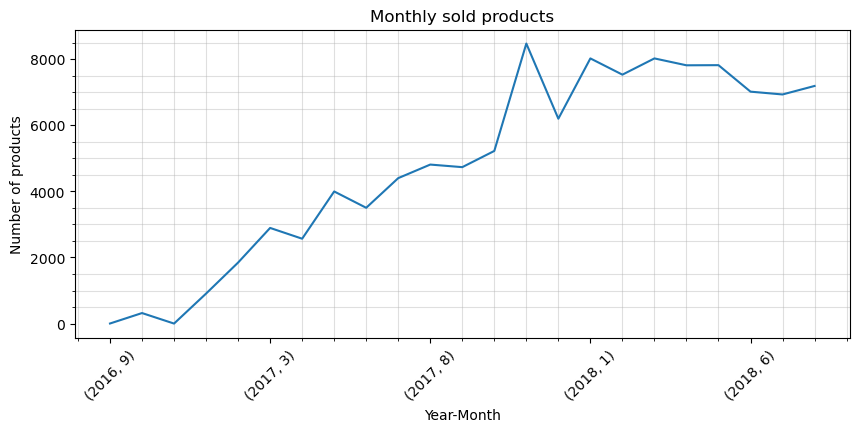

In [98]:
# number of sold products overtime
monthly_sale_total.plot( figsize=(10,4), title='Monthly sold products')
plt.ylabel('Number of products')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.4)
plt.show()

In [88]:
monthly_revenue = grouped_orders_df.groupby(['year','month'])['price'].sum().unstack()
monthly_revenue 

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.97,40941.30,NaN,10.90
2017,111208.50,233028.03,358531.17,340729.56,487942.15,423704.07,480457.86,554823.87,607588.59,648610.35,986975.52,727018.61
2018,922819.76,827631.01,953501.42,972421.13,972230.45,860805.99,863838.08,844092.39,NaN,NaN,NaN,NaN


In [89]:
monthly_Revenue = grouped_orders_df.resample("ME", on="order_purchase_timestamp")['price'].sum()
monthly_Revenue.index = monthly_Revenue.index.strftime('%b %Y')    #  to have the date like yyyy-MM 

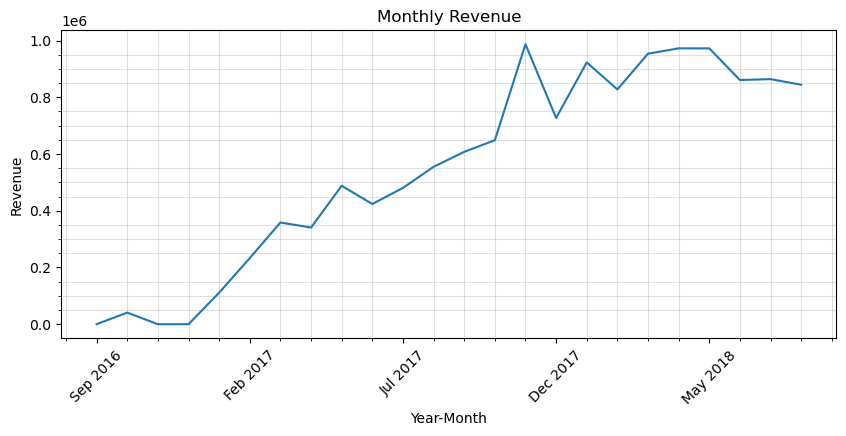

In [97]:
monthly_Revenue.plot( figsize=(10,4), title='Monthly Revenue')
plt.ylabel('Revenue')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.minorticks_on()
plt.grid(which='minor', alpha=0.4)
plt.show()

In [ ]:
# Average monthly revenue

In [102]:
monthly_Revenue.mean()

550793.57

---

### 3.3. How many products are there on the products table?
### Which are the categories with the most products? 
### What’s the price for the most expensive and cheapest products? 
### What’s the average price of the products being sold?

In [105]:
# The number of products on the products table
translated_products_df['product_id'].nunique()

32951

In [106]:
# Categories with the most products
ten_top_categories = translated_products_df.groupby('product_category_name')['product_id'].count().nlargest(10)
ten_top_categories

product_category_name
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

C:\Users\Fariba\AppData\Local\Temp\ipykernel_22472\2077137587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ten_top_categories.values, y=ten_top_categories.index, orient='h', palette='viridis')


''

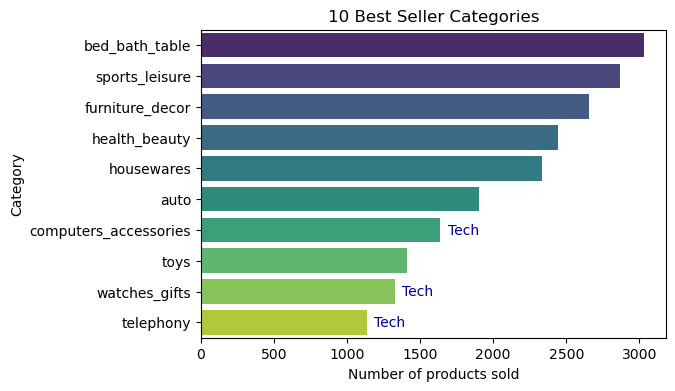

In [250]:
# Barchart for ten top categories in the whole period of time (23 months)
plt.figure(figsize=(6,4))
sns.barplot(x=ten_top_categories.values, y=ten_top_categories.index, orient='h', palette='viridis')
plt.xlabel('Number of products sold')
plt.ylabel('Category')
plt.title('10 Best Seller Categories')

# Add custom text for the tech-products
target_categories = 'computers_accessories', 'telephony', 'watches_gifts'
for target_category in target_categories:
    target_value = ten_top_categories[target_category]
    target_index = ten_top_categories.index.get_loc(target_category)
    
    # Place the text slightly to the right of the bar
    plt.text(x=target_value + 50, y=target_index, s='Tech', va='center', color='darkblue')
;

In [104]:
translated_products_df.head(3)

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,00066f42aeeb9f3007548bb9d3f33c38,53,596,6,300,20,16,16,perfumery
1,00088930e925c41fd95ebfe695fd2655,56,752,4,1225,55,10,26,auto
2,0009406fd7479715e4bef61dd91f2462,50,266,2,300,45,15,35,bed_bath_table


In [112]:
# Calculate the price for the most expensive and cheapest products
ten_expensive_categories = order_items_df[['product_id','price']].nlargest(10, columns='price')
ten_expensive_categories

,product_id,price
3556,489ae2aa008f021502940f251d4cce7f,6735.00
112233,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
107841,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
74336,a6492cc69376c469ab6f61d8f44de961,4799.00
11249,c3ed642d592594bb648ff4a04cee2747,4690.00
62086,259037a6a41845e455183f89c5035f18,4590.00
29193,a1beef8f3992dbd4cd8726796aa69c53,4399.87
45843,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
78310,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
59137,6902c1962dd19d540807d0ab8fade5c6,3999.90


In [115]:
# Add the gategory name to the dataframe
ten_expensive_categories_merged = pd.merge(ten_expensive_categories,translated_products_df, on= 'product_id', how='inner')
ten_expensive_categories_merged = ten_expensive_categories_merged[['product_category_name','price']]

In [116]:
ten_expensive_categories_merged 

,product_category_name,price
0,housewares,6735.00
1,computers,6729.00
2,art,6499.00
3,small_appliances,4799.00
4,small_appliances,4690.00
5,computers,4590.00
6,musical_instruments,4399.87
7,consoles_games,4099.99
8,sports_leisure,4059.00
9,watches_gifts,3999.90


In [118]:
# Calculate the price of the most cheapest product
cheapest_category = order_items_df['price'].nsmallest(1)
cheapest_category

27652    0.85
Name: price, dtype: float64

In [157]:
# The average price of the products being sold
avg_price_sold_items = order_items_df['price'].mean()
print(f"The average price of the products being sold is: {avg_price_sold_items:.2f}$")

The average price of the products being sold is: 120.65$


---

### 3.4. What categories of tech products does Magist have?
#### How many products of these tech categories have been sold (within the time window of the database snapshot)?
#### What percentage does that represent from the overall number of products sold?
#### Are expensive tech products popular?

In [125]:
translated_products_df['product_category_name'].unique()

array(['perfumery', 'auto', 'bed_bath_table', 'housewares',
       'watches_gifts', 'cool_stuff', 'consoles_games', 'furniture_decor',
       'health_beauty', 'fashion_shoes', 'computers_accessories', 'toys',
       'pet_shop', 'sports_leisure', 'garden_tools',
       'furniture_living_room', 'luggage_accessories',
       'home_construction', 'kitchen_dining_laundry_garden_furniture',
       'construction_tools_construction', 'furniture_bedroom',
       'fashion_male_clothing', 'construction_tools_safety',
       'fashion_bags_accessories', 'diapers_and_hygiene', 'others',
       'telephony', 'christmas_supplies', 'stationery', 'fixed_telephony',
       'books_general_interest', 'electronics', 'pc_gamer', 'baby',
       'home_appliances', 'food', 'agro_industry_and_commerce',
       'books_imported', 'construction_tools_lights', 'drinks',
       'costruction_tools_tools', 'home_appliances_2', 'small_appliances',
       'industry_commerce_and_business', 'dvds_blu_ray',
       'books_tec

In [129]:
# What categories of tech products does Magist have?
tec_products = translated_products_df['product_category_name'].str.contains('computer|telephon|pc_game|tablet|audio|electronics', case=False)

In [131]:
tec_products_df = translated_products_df[tec_products]
tec_products_df

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
13,0021a87d4997a48b6cef1665602be0f5,58,946,6,650,25,10,15,computers_accessories
60,00917855135d67fb060dcd81863166a4,55,197,1,1133,16,16,11,computers_accessories
68,00a0db09dc7c94d512ec51900141ed69,57,338,3,400,23,7,15,computers_accessories
69,00a8c742ae1da97e9064205459977e6c,38,581,1,150,16,23,13,computers_accessories
70,00a985c524adbb97a4211e4ce17aabec,58,734,3,250,17,4,12,telephony
...,...,...,...,...,...,...,...,...,...
32901,ffae6024df16802ba75f761d9aa24367,52,845,2,150,27,5,20,telephony
32914,ffbfa9e143fda4420454d0f4e88a3cd5,51,2026,3,793,28,15,32,computers_accessories
32936,ffe75578163d45caa52bca3529cb511e,60,818,6,350,17,4,12,telephony
32939,ffeb228c521d5464d1f71444da96c446,46,394,4,200,19,3,11,telephony


In [133]:
# List of tech products which magist has
tec_products_df['product_category_name'].unique()

array(['computers_accessories', 'telephony', 'fixed_telephony',
       'electronics', 'pc_gamer', 'audio', 'computers',
       'tablets_printing_image'], dtype=object)

In [166]:
# How many products of these tech categories have been sold
tec_product_sold_df = order_items_df[order_items_df['product_id'].isin(tec_products_df['product_id'])]
num_tec_product_sold = tec_product_sold_df.shape[0]
print(f"Number of tech products sold is: {num_tec_product_sold}")

Number of tech products sold is: 16062


In [167]:
total_number_sold = order_items_df['product_id'].count()
total_number_sold

112650

In [168]:
# Calculate the percentage of tech products sale
print(f"Percentage of tech product's sale: {(100*num_tec_product_sold/total_number_sold):.2f}")

Percentage of tech product's sale: 14.26


In [170]:
# Are expensive tech products popular?
# first step: categorize the prices

def get_price_category(price):
    if price > 1000:
        return 'expensive'
    elif price > 100:
        return 'Mid-range'
    else:
        return 'cheap'
        
tec_product_sold_df.loc[:,'price_range'] = tec_product_sold_df.loc[:,'price'].apply(get_price_category)


In [172]:
tec_product_sold_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_range
105322,ef43444651cdedfaefc1123e4acd02aa,2,b0c8da302d49498d2ce6be8c631e4e20,88460e8ebdecbfecb5f9601833981930,2018-06-07 04:31:56,59.90,13.54,cheap
64351,9312a513c9aa606d098a856e87a68d33,1,9cc7982cbd4b6bd47802ac85347035dd,d5ba419e26d246a0719437cf37d9b46d,2018-04-19 16:31:00,95.00,8.43,cheap
15849,2438d5b697d42d6c29d6cd8c6a7eef4f,1,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,2018-01-15 15:57:30,21.99,15.10,cheap
13932,1fb291320c9a5276869ee9f50fe885e2,1,e6a09abfe91b8e27c7fe22aac84dc333,9f505651f4a6abe901a56cdc21508025,2018-07-30 20:44:25,54.99,18.19,cheap
72013,a446e19eaf1b7ae1ac483f47c29c2d36,1,7ce94ab189134e2d3c05f496d635419c,8b321bb669392f5163d04c59e235e066,2018-02-21 16:26:41,13.65,11.85,cheap


In [180]:
#  second step: Calculate the percentage of expensive tech products

number_expensive_tech_products = int(tec_product_sold_df['price_range'].value_counts().iloc[2])

# we have calculated the totel number of tech products sold: num_tec_product_sold

print(f"The ercentage of expensive tech products sold: {100 * number_expensive_tech_products/num_tec_product_sold:.2f}%")

The ercentage of expensive tech products sold: 1.21%


In [126]:
order_items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 11:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 13:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 15:48:30,199.0,17.87


### 3.5. How is the delivery capacity of Magist?
#### What’s the average time between the order being placed and the product being delivered?
#### How many orders are delivered on time vs orders delivered with a delay?
#### Is there any pattern for delayed orders, e.g. big products being delayed more often?

In [186]:
orders_df.loc[:,'delivery_time'] = (orders_df['order_delivered_customer_date']-orders_df['order_purchase_timestamp']).dt.days

In [187]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 10:59:02,2017-09-13 11:45:35,2017-09-19 20:34:16,2017-09-21 01:43:48,2017-09-29 02:00:00,7.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 12:53:06,2017-04-26 13:05:13,2017-05-04 16:35:00,2017-05-12 18:04:24,2017-05-15 02:00:00,16.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 15:33:31,2018-01-14 15:48:30,2018-01-16 13:36:48,2018-01-22 14:19:16,2018-02-05 01:00:00,7.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 12:00:35,2018-08-08 12:10:18,2018-08-10 15:28:00,2018-08-14 15:32:39,2018-08-20 02:00:00,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 14:57:51,2017-02-04 15:10:13,2017-02-16 10:46:09,2017-03-01 17:42:31,2017-03-17 01:00:00,25.0


In [188]:
# Calculate the average delivery time
avg_delivery_time = orders_df['delivery_time'].mean()
print(f"The average delivery time is: {int(avg_delivery_time)} days")

The average delivery time is: 12 days


##### To make sure everything is allright, we have to take a look at distribution, to see whether there are outliers or not

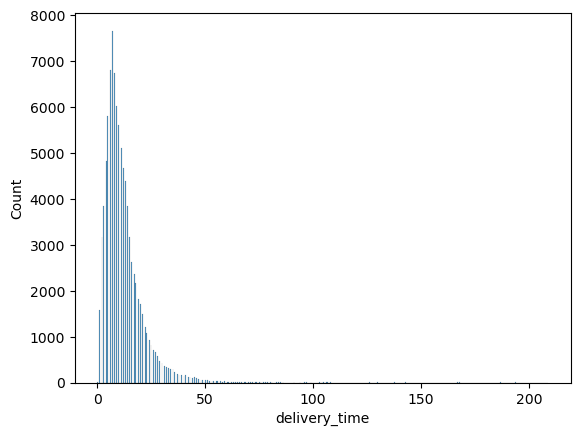

In [192]:
# Plot the histogram chart of delivery time

sns.histplot(data=orders_df, x= 'delivery_time');

##### It seems that we have many outliers. To explore more and remove outliers we use Boxplot

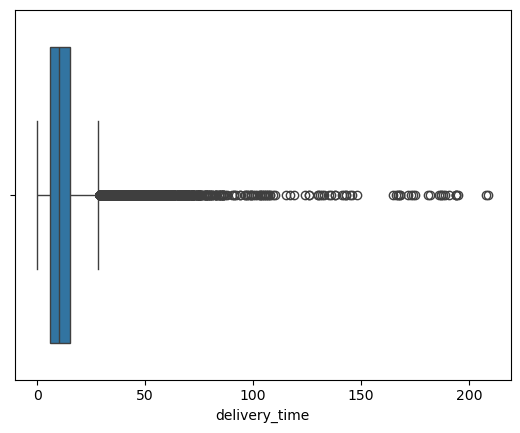

In [191]:
sns.boxplot(data=orders_df, x='delivery_time');

In [193]:
# build a function to remove outliers
def remove_outliers(df,columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR
        df_clean = df_clean.loc[(df_clean[column] >= lower_whisker) & (df_clean[column] <= upper_whisker)]
    return df_clean

In [196]:
# applying the function to dataframe
orders_df_filtered = remove_outliers(orders_df, ['delivery_time'])


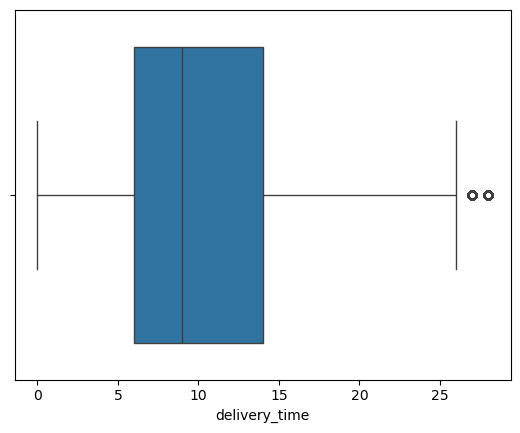

In [197]:
sns.boxplot(data=orders_df_filtered, x='delivery_time');

##### Now we calculate the average delivery time using orders_df_filtered

In [198]:
avg_delivery_time = orders_df_filtered['delivery_time'].mean()
print(f"The average delivery time is: {int(avg_delivery_time)} days")

The average delivery time is: 10 days


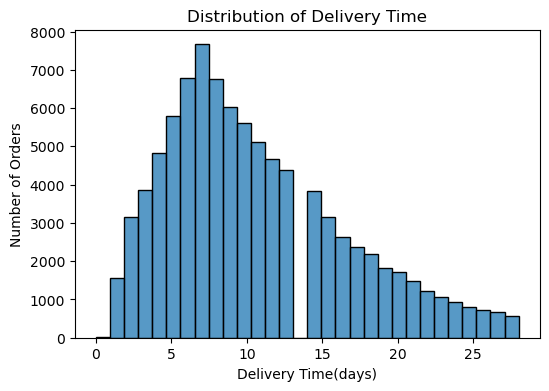

In [203]:
plt.figure(figsize=(6,4))
sns.histplot(data=orders_df_filtered, x= 'delivery_time', bins=30)
plt.xlabel('Delivery Time(days)')
plt.ylabel('Number of Orders')
plt.title('Distribution of Delivery Time');

#### As we can see, the most products are delivered within 7 days!! which seems not fats nowadays. 

#### Calculate the percentage of On-schedule delivery

In [205]:
orders_df_filtered['order_status'].value_counts()

order_status
delivered    91425
canceled         3
Name: count, dtype: int64

In [209]:
number_on_schedule_delivery = orders_df_filtered[orders_df_filtered['order_delivered_customer_date'] < orders_df_filtered['order_estimated_delivery_date']].shape[0]
total_orders = orders_df_filtered.shape[0]   
print(f"The percentage of on-schedule delivery is {100*number_on_schedule_delivery/total_orders:.2f}%")

The percentage of on-schedule delivery is 95.79%


#### Although 95.79% of orders arrive without delay, the average delivery time of 10 days remains high nowadays.

#### Calculate the percentage of delayed delivery

In [210]:
number_delayed_delivery = orders_df_filtered[orders_df_filtered['order_delivered_customer_date'] > orders_df_filtered['order_estimated_delivery_date']].shape[0]
total_orders = orders_df_filtered.shape[0]   
print(f"The percentage of delivery delayed is {100*number_delayed_delivery/total_orders:.2f}%")

The percentage of delivery delayed is 4.21%


In [230]:
# Build a function to create a new column of delivery types
def get_delivery_type(df):
    if df['order_status'] == 'delivered':
        if df['order_delivered_customer_date'] > df['order_estimated_delivery_date']:
            return 'delayed'
        elif df['order_delivered_customer_date'] < df['order_estimated_delivery_date']:
            return 'on-schedule'
        elif df['order_delivered_customer_date'] == df['order_estimated_delivery_date']:
            return 'on-time'
    return 'canceled'
    

In [231]:
# apply the function to the dataframe
orders_df_filtered['delivery_type']=orders_df_filtered.apply(get_delivery_type , axis=1)
orders_df_filtered.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_type
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 10:59:02,2017-09-13 11:45:35,2017-09-19 20:34:16,2017-09-21 01:43:48,2017-09-29 02:00:00,7.0,on-schedule
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 12:53:06,2017-04-26 13:05:13,2017-05-04 16:35:00,2017-05-12 18:04:24,2017-05-15 02:00:00,16.0,on-schedule


In [233]:
delivery_type_counts = orders_df_filtered['delivery_type'].value_counts()

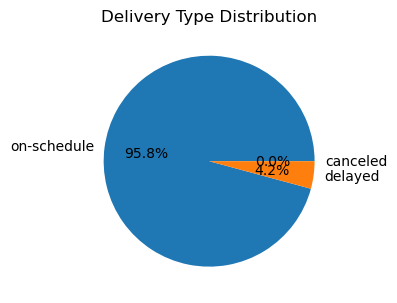

In [236]:
# plot a pie chart for delivery
plt.figure(figsize=(4,4), dpi=100)
plt.pie(delivery_type_counts, labels=delivery_type_counts.index, autopct='%1.1f%%')
plt.title('Delivery Type Distribution')
plt.tight_layout();

---

### 3.6. Is there any pattern for delayed orders, e.g. big products being delayed more often?

In [212]:
orders_df_filtered.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 10:59:02,2017-09-13 11:45:35,2017-09-19 20:34:16,2017-09-21 01:43:48,2017-09-29 02:00:00,7.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 12:53:06,2017-04-26 13:05:13,2017-05-04 16:35:00,2017-05-12 18:04:24,2017-05-15 02:00:00,16.0


In [214]:
translated_products_df.head(2)

,product_id,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_volume_cm3
0,00066f42aeeb9f3007548bb9d3f33c38,53,596,6,300,20,16,16,perfumery,5120
1,00088930e925c41fd95ebfe695fd2655,56,752,4,1225,55,10,26,auto,14300


In [216]:
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 11:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 13:05:13,239.9,19.93


In [217]:
# calculate the volume of products
translated_products_df['product_volume_cm3'] = (
    translated_products_df['product_length_cm'] *
    translated_products_df['product_height_cm'] *
    translated_products_df['product_width_cm']
)

# merge three dataframes (orders_df, order_items_df and translated_products_df)

merged_orders_ordersitems = pd.merge(orders_df_filtered, order_items_df, on='order_id', how='left')
merged_orders_orderitems_products = pd.merge(merged_orders_ordersitems, translated_products_df, on= 'product_id', how='left')


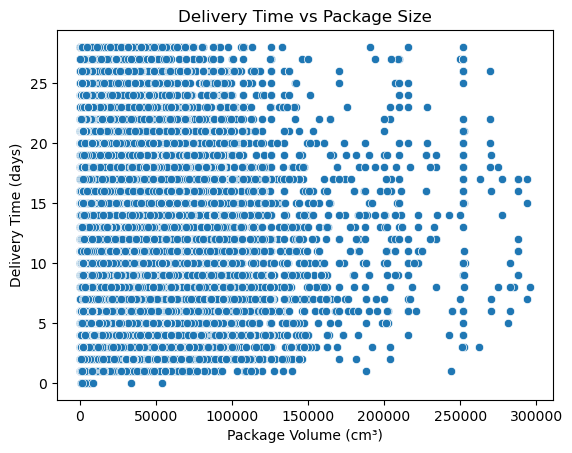

In [218]:
# Using Scatterplot to see the correlation

sns.scatterplot(data=merged_orders_orderitems_products, x='product_volume_cm3', y='delivery_time')
plt.xlabel('Package Volume (cm³)')
plt.ylabel('Delivery Time (days)')
plt.title('Delivery Time vs Package Size')
plt.show()


#### It gives us almost nothing, let's explore more!

In [223]:
# build a function to categorize the size of products
def get_size_category(v):
    if v >200000:
        return 'L'
    elif v > 100000:
        return 'M'
    elif v>50000:
        return 'S'
    else:
        return 'XS'

merged_orders_orderitems_products.loc[:,'size_category'] = merged_orders_orderitems_products.loc[:,'product_volume_cm3'].apply(get_size_category)
   

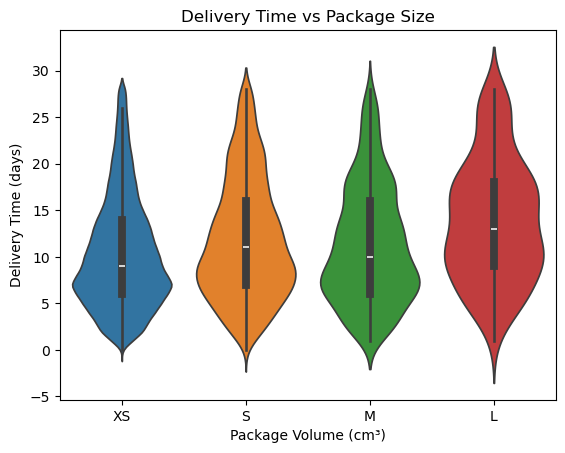

In [225]:
# After categorizing the size, violinplot is being used to see the correlation between delivery time and size

sns.violinplot(data=merged_orders_orderitems_products, x='size_category', y='delivery_time', hue='size_category')
plt.xlabel('Package Volume (cm³)')
plt.ylabel('Delivery Time (days)')
plt.title('Delivery Time vs Package Size')
plt.show()


#### Package size appears to influence delivery time. Larger packages (size category L) tend to have significantly longer delivery times. This suggests that package volume should be considered when evaluating delivery efficiency and customer satisfaction.

## 3.7.Regional Concentration of Customers and sellers

In [254]:
order_items_df.shape

(112650, 7)

In [258]:
order_items_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 11:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 13:05:13,239.9,19.93


In [259]:
# merge seller dataframe to order_items_df to have the zip code of sellers in the df
merged_orderitems_sellers = pd.merge(order_items_df, sellers_df, on='seller_id', how='left')

In [260]:
# merge customer dataframe to orders_df_filtered to have the zip code of customers in the df
merged_orders_customers = pd.merge(orders_df_filtered, customers_df, on='customer_id', how='left')

In [283]:
# merge the both dataframe above to have the zip codes of sellers and customers in the orders dataframes
merged =pd.merge(merged_orderitems_sellers, merged_orders_customers, on ='order_id', how='left')

In [284]:
merged.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_type,customer_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 11:45:35,58.9,13.29,27277,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 10:59:02,2017-09-13 11:45:35,2017-09-19 20:34:16,2017-09-21 01:43:48,2017-09-29 02:00:00,7.0,on-schedule,28013.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 13:05:13,239.9,19.93,3471,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 12:53:06,2017-04-26 13:05:13,2017-05-04 16:35:00,2017-05-12 18:04:24,2017-05-15 02:00:00,16.0,on-schedule,15775.0


In [294]:
# Filter out NaNs just for plotting
plot_df = merged.dropna(subset=['customer_zip_code_prefix', 'seller_zip_code_prefix']).copy()

# convert the datatype of zipcodes for customers into ont(just like seller's)
plot_df['customer_zip_code_prefix'] = plot_df['customer_zip_code_prefix'].astype(int)


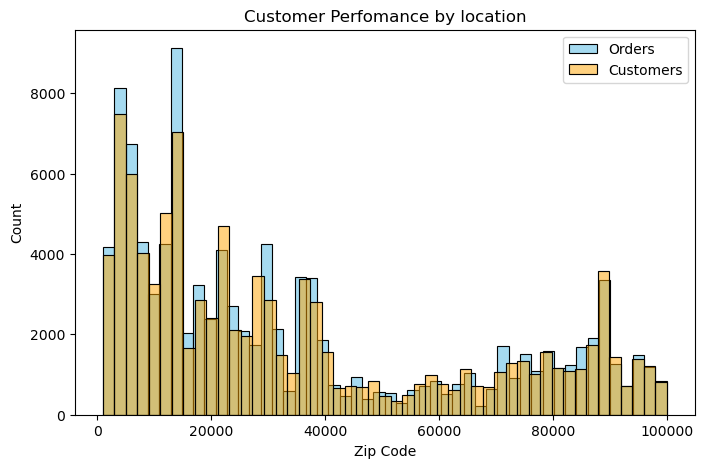

In [309]:
plt.figure(figsize=(8,5))
sns.histplot(data=plot_df , x='customer_zip_code_prefix',color='skyblue', label='Orders')  # Since Customers are not unique here, it represent the number of orders
sns.histplot(data=customers_df , x='customer_zip_code_prefix', color='orange', label='Customers', alpha=0.5)  # Customers are unique(imported from Customers_df)
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Customer Perfomance by location')
plt.legend();

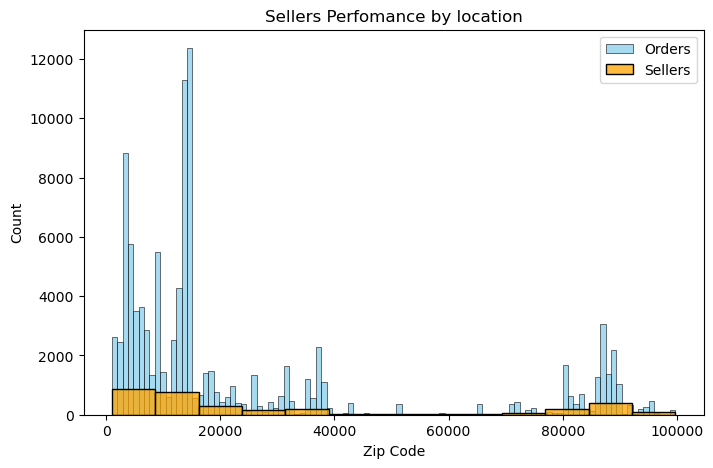

In [310]:
plt.figure(figsize=(8,5))
sns.histplot(data=plot_df , x='seller_zip_code_prefix',color='skyblue', label='Orders')   # Since sellers are not unique here, they represent the number of their appearance in the dataframe, which shows their activities
sns.histplot(data=sellers_df , x='seller_zip_code_prefix', color='orange', label='Sellers')  # Sellers are unique(imported from sellers_df)
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.title('Sellers Perfomance by location')
plt.legend();

In [311]:
# Most Active Regions by Number of Orders
plot_df['customer_zip_code_prefix'].value_counts().nlargest(10)

customer_zip_code_prefix
22790    129
24220    128
24230    126
29101    107
35162    107
22793    106
22775    106
13087    102
13212    101
36570     99
Name: count, dtype: int64

In [313]:
!pip install pgeocode

  Using cached pgeocode-0.5.0-py3-none-any.whl.metadata (7.9 kB)
Using cached pgeocode-0.5.0-py3-none-any.whl (9.8 kB)


In [317]:
# import pgeocode module to see the exact location of these zip codes
import pgeocode
zip_counts = pd.Series({
                        22790: 129,
                        24220: 128,
                        24230: 126,
                        29101: 107,
                        35162: 107,
                        22793: 106,
                        22775: 106,
                        13087: 102,
                        13212: 101,
                        36570: 99
                    }, name="count")

zip_df = zip_counts.reset_index()         # Create a DataFrame
zip_df.columns = ["zip_code", "count"]

nomi = pgeocode.Nominatim("BR")         # initialize pgeocode for Brazil 

# Convert to full 8-digit zip codes as strings, e.g. "22790000", since Brazilian postal code prefixes have 8 digits but we have only 5
zip_df["zip_code_full"] = zip_df["zip_code"].astype(str).str.pad(8, side="right", fillchar="0")


geo_info = nomi.query_postal_code(zip_df["zip_code"].astype(str))

result = pd.concat([zip_df, geo_info[["place_name", "state_name"]]], axis=1)

print(result)

   zip_code  count zip_code_full place_name state_name
0     22790    129      22790000        NaN        NaN
1     24220    128      24220000        NaN        NaN
2     24230    126      24230000        NaN        NaN
3     29101    107      29101000        NaN        NaN
4     35162    107      35162000        NaN        NaN
5     22793    106      22793000        NaN        NaN
6     22775    106      22775000        NaN        NaN
7     13087    102      13087000        NaN        NaN
8     13212    101      13212000        NaN        NaN
9     36570     99      36570000        NaN        NaN


### As we can see  it hasn'worked yet. It still needs some work!! BUT we can realize that the sale concentration of Magist seems to be on one region! it has to be checked..